In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

PART-A

1

Dataset shape: (104651, 28)
First 10 rows of the dataset:


C:\Users\ammad\AppData\Local\Temp\ipykernel_12924\255442049.py:2: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("listings_airbnb.csv")


,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license,price_clean,price_dirty
0,14742560,Classic Artist Loft,97210996539,verified,Josh,Brooklyn,Columbia St,40.68626,-74.00141,United States,...,9.0,6/26/2019,0.38,5.0,1.0,74.0,Please note that we are a no smoking environme...,NaN,616.0,$616.00
1,55508928,Étage au sein d’un duplex à Brooklyn,33249221187,unconfirmed,Sophie & Grégoire,Brooklyn,Clinton Hill,40.68227,-73.96486,United States,...,9.0,6/30/2019,0.89,2.0,1.0,17.0,#NAME?,NaN,1095.0,$1095.00
2,30561537,AMAZING view in ultra luxury midtown apartment!,63109258528,verified,May,Manhattan,Hell's Kitchen,40.75275,-73.99330,United States,...,28.0,2/17/2022,3.64,4.0,6.0,334.0,NaN,NaN,969.0,969.0
3,13914662,Harlem Home Away from Home!,42768739399,verified,Arielle,Manhattan,Harlem,40.82843,-73.94672,United States,...,4.0,6/25/2019,0.16,1.0,1.0,0.0,No pets. No smoking. Please :),NaN,778.0,778.0
4,9063811,Cozy Loft in Flushing,41428819097,verified,Erjon,Queens,Flushing,40.75485,-73.82138,United States,...,1.0,3/25/2016,0.02,1.0,1.0,368.0,No smoking please. Sorry but no pets. No drink...,NaN,815.0,Rs 130400
5,22883462,Real Brooklyn Apt on Pacific and New York,1508400733,unconfirmed,Matt,Brooklyn,Crown Heights,40.67683,-73.94702,United States,...,2.0,2/1/2019,0.32,4.0,1.0,220.0,Check-in time can sometimes be flexible and we...,NaN,172.0,Rs 27520
6,38229670,"Prime, Spacious West Village Apartment",22981236558,verified,Jordan,Manhattan,Greenwich Village,40.73129,-74.00097,United States,...,61.0,4/5/2020,1.95,4.0,1.0,0.0,NaN,NaN,1181.0,$1181.00
7,26509864,"PRIVATE, NEWLY RENOVATED BEDROOM, 10 MINS FROM...",82159107182,unconfirmed,Mina,Queens,Howard Beach,40.66635,-73.85258,United States,...,3.0,7/6/2019,2.14,2.0,4.0,329.0,NaN,NaN,320.0,£256.00
8,55141648,Bright Williamsburg room with huge private ter...,40990182521,unconfirmed,Ben,Brooklyn,Williamsburg,40.71247,-73.94548,United States,...,2.0,9/5/2018,0.18,5.0,1.0,0.0,#NAME?,NaN,986.0,£788.80
9,9103577,Charming Prewar Upper West Side Apt,87433243922,verified,Daniel,Manhattan,Upper West Side,40.79828,-73.97166,United States,...,0.0,NaN,NaN,1.0,1.0,95.0,NaN,NaN,714.0,$714.00



Info of the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104651 entries, 0 to 104650
Data columns (total 28 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              104651 non-null  int64  
 1   NAME                            104397 non-null  object 
 2   host id                         104651 non-null  int64  
 3   host_identity_verified          104354 non-null  object 
 4   host name                       104233 non-null  object 
 5   neighbourhood group             104621 non-null  object 
 6   neighbourhood                   104635 non-null  object 
 7   lat                             104643 non-null  float64
 8   long                            104643 non-null  float64
 9   country                         104110 non-null  object 
 10  country code                    104517 non-null  object 
 11  instant_bookable                104543 non-null  object 

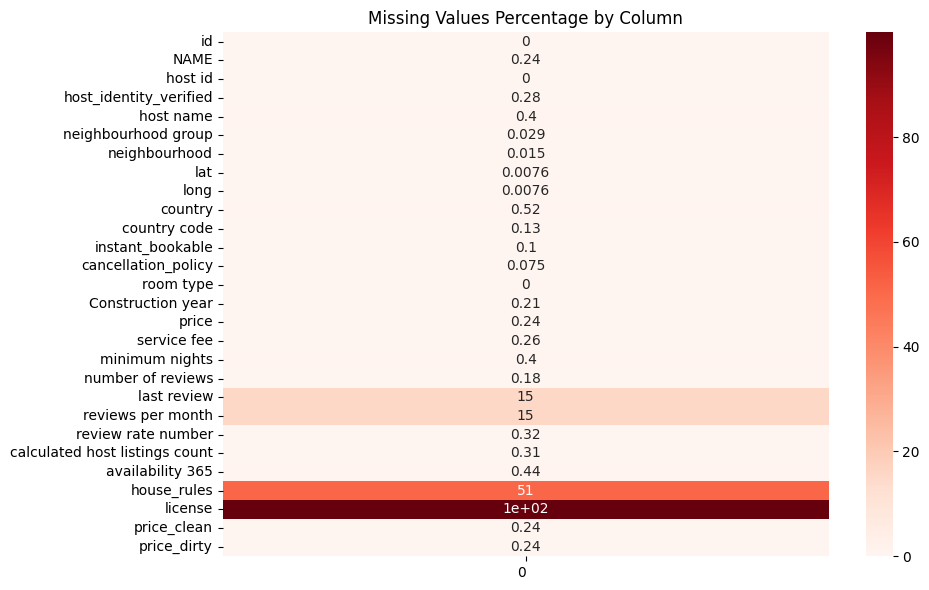

In [64]:
# Load data from a CSV file
df = pd.read_csv("listings_airbnb.csv")

 # Print shape
print(f"Dataset shape: {df.shape}")

# Display the first 10 rows of the dataframe
from IPython.display import display
print("First 10 rows of the dataset:")
display(df.head(10))

#Check for info of columns in the dataframe
print("\nInfo of the dataset:")
print(df.info())

#Percentages of missing values in each column
missing_percentages = (df.isnull().sum() / len(df)) * 100
print("\nPercentage of missing values in each column:")
print(missing_percentages)

#visulaize percentages with heamtap
plt.figure(figsize=(10, 6))
sns.heatmap(missing_percentages.to_frame(), cmap="Reds", annot=True, cbar=True)
#sns.heatmap(missing_percentages.to_frame(), cmap="Reds", annot=True, cbar=True)
plt.title("Missing Values Percentage by Column")
plt.yticks(rotation=0)
plt.xticks(rotation=0, ha='right')
plt.tight_layout()
plt.show()


2

In [65]:

display(df[["price_dirty","price","price_clean"]].sample(10))
#as price_clean is the actual price and is in float so removing others 2
df.drop(columns=['price_dirty',"price"], inplace=True)

,price_dirty,price,price_clean
5735,344.0,$344,344.0
56764,$774.00,$774,774.0
77673,£649.60,$812,812.0
21083,£174.40,$218,218.0
84260,572.0,$572,572.0
8950,€569.70,$633,633.0
75071,€216.00,$240,240.0
64325,539.0,$539,539.0
88509,$171.00,$171,171.0
18254,£575.20,$719,719.0


In [66]:
#date_formatting
#rint("\nSample 'last review' values before conversion:")
#display(df["last review"].sample(10))

df['last review_date'] = pd.to_datetime(df['last review'], errors='coerce', dayfirst=False)

print("\nSample 'last review' values after conversion:")
display(df[["last review_date","last review"]].sample(10))

df.drop(columns=['last review'], inplace=True)


Sample 'last review' values after conversion:


,last review_date,last review
25802,2019-05-28,5/28/2019
1242,2021-05-11,5/11/2021
69811,NaT,NaN
13927,2021-01-01,1/1/2021
57506,2019-06-17,6/17/2019
39670,NaT,NaN
76663,2018-08-19,8/19/2018
59187,2019-05-30,5/30/2019
36587,2019-07-06,7/6/2019
72779,2016-12-27,12/27/2016


In [67]:
import re

#this method will help us to identify the pattern used in the currency format
def extract_currency_pattern(x):
    return re.sub(r"\d", "0", str(x))  # replace digits with 0 to see format

patterns = df["service fee"].apply(extract_currency_pattern)
print(patterns.value_counts()   )

#so shown that the format used in it is $0.00
#now we have to convert service fee to proper float values

df["service fee_cleaned"] = (
    df["service fee"]
    .str.replace(r"[^\d.,]", "", regex=True)   # remove symbols & letters
    .str.replace(",", "")                      # remove thousand separators
)

df["service fee_cleaned"] = pd.to_numeric(df["service fee_cleaned"], errors="coerce")

display(df[["service fee","service fee_cleaned"]].sample(10))

df.drop(columns=["service fee"], inplace=True)


service fee
$000     63824
$00      40551
nan        276
Name: count, dtype: int64


,service fee,service fee_cleaned
55827,$35,35.0
20952,$210,210.0
96367,$105,105.0
2145,$192,192.0
16504,$169,169.0
5552,$36,36.0
54894,$62,62.0
38181,$226,226.0
21368,$96,96.0
67762,$187,187.0


In [69]:
#text casing
cols = df.select_dtypes(include=['object']).columns

for col in cols:
    df[col] = df[col].astype(str).str.strip().str.upper().replace(["nan","NAN", "NaN", "None", "NONE"], pd.NA)
   
print("\nSample text columns after casing:")
display(df[cols].sample(10))



Sample text columns after casing:


,NAME,host_identity_verified,host name,neighbourhood group,neighbourhood,country,country code,instant_bookable,cancellation_policy,room type,house_rules,license
43603,CHARMING STUDIO IN HISTORIC INWOOD-NYC!,UNCONFIRMED,LAUREN & RON,MANHATTAN,INWOOD,UNITED STATES,US,TRUE,STRICT,ENTIRE HOME/APT,<NA>,<NA>
17870,BROOKLYN CULTURAL CHATEAU: SUNNY PRIVATE ROOM,VERIFIED,NATE,BROOKLYN,BUSHWICK,UNITED STATES,US,FALSE,MODERATE,PRIVATE ROOM,<NA>,<NA>
72555,DUPLEX W/ TERRACE @ BOX HOUSE HOTEL,VERIFIED,THE BOX HOUSE HOTEL,BROOKLYN,GREENPOINT,UNITED STATES,US,TRUE,MODERATE,PRIVATE ROOM,<NA>,<NA>
104556,GORGEOUS DUPLEX APARTMENT WITH A GARDEN,VERIFIED,KSENIA,BROOKLYN,BEDFORD-STUYVESANT,UNITED STATES,US,FALSE,MODERATE,ENTIRE HOME/APT,NO SHOES INSIDE THE HOUSE,<NA>
85998,"SUNNY, MASSIVE EAST VILLAGE LOFT",VERIFIED,DUSTIN,MANHATTAN,EAST VILLAGE,UNITED STATES,US,FALSE,STRICT,PRIVATE ROOM,<NA>,<NA>
10773,SUNNY APARTMENT NEAR PROSPECT PARK,UNCONFIRMED,KATE,BROOKLYN,CROWN HEIGHTS,UNITED STATES,US,FALSE,FLEXIBLE,PRIVATE ROOM,<NA>,<NA>
41894,"ALL CHARM: LUSH GARDEN, HUGE KITCHEN, CAT, PEACE",UNCONFIRMED,JASMINE,BROOKLYN,GREENPOINT,UNITED STATES,US,TRUE,MODERATE,ENTIRE HOME/APT,<NA>,<NA>
16773,"NYCT02-1 CANAL ST, TRIBECA, SOHO, LES, NYU",VERIFIED,LAURA,MANHATTAN,CHINATOWN,UNITED STATES,US,FALSE,MODERATE,PRIVATE ROOM,"PLEASE CLEAN YOUR DISHES, ALTERNATE WHO TAKES ...",<NA>
30104,CHARMING UES STUDIO,UNCONFIRMED,ALICIA,MANHATTAN,UPPER EAST SIDE,UNITED STATES,US,TRUE,STRICT,ENTIRE HOME/APT,- QUIET TIME AFTER 15,<NA>
96889,1GREAT BUDGET PRIVATE ROOM,VERIFIED,DIGNA,BROOKLYN,BEDFORD-STUYVESANT,UNITED STATES,US,FALSE,MODERATE,PRIVATE ROOM,<NA>,<NA>


3

In [70]:
for col in df.columns:
    print(df[col].apply(lambda x: type(x)).value_counts())
    print("-----")

id
<class 'int'>    104651
Name: count, dtype: int64
-----
NAME
<class 'str'>                            104397
<class 'pandas._libs.missing.NAType'>       254
Name: count, dtype: int64
-----
host id
<class 'int'>    104651
Name: count, dtype: int64
-----
host_identity_verified
<class 'str'>                            104354
<class 'pandas._libs.missing.NAType'>       297
Name: count, dtype: int64
-----
host name
<class 'str'>                            104225
<class 'pandas._libs.missing.NAType'>       426
Name: count, dtype: int64
-----
neighbourhood group
<class 'str'>                            104621
<class 'pandas._libs.missing.NAType'>        30
Name: count, dtype: int64
-----
neighbourhood
<class 'str'>                            104635
<class 'pandas._libs.missing.NAType'>        16
Name: count, dtype: int64
-----
lat
<class 'float'>    104651
Name: count, dtype: int64
-----
long
<class 'float'>    104651
Name: count, dtype: int64
-----
country
<class 'str'>                   

4

In [71]:
#Percentages of missing values in each column
print("before")
missing_percentages = (df.isnull().sum() / len(df)) * 100
print("\nPercentage of missing values in each column:")
print(missing_percentages)

for index in missing_percentages.index:
    if missing_percentages[index]>40:
       df.drop(columns=[index], inplace=True)
       
for col in df.select_dtypes(include=['object']).columns:
    df[col].fillna(df[col].mode()[0], inplace=True)


for col in df.select_dtypes(include=['number']).columns:
    skewness=df[col].skew()
    if abs(skewness) < 0.5:
        #mean imputation because skewness is less
        df[col].fillna(df[col].mean(), inplace=True)
    else:
        #median imputation because skewness is more
        df[col].fillna(df[col].median(), inplace=True)

#Percentages of missing values in each column
print("after")
missing_percentages = (df.isnull().sum() / len(df)) * 100
print("\nPercentage of missing values in each column:")
print(missing_percentages)


before

Percentage of missing values in each column:
id                                 0.000000
NAME                               0.242711
host id                            0.000000
host_identity_verified             0.283800
host name                          0.407067
neighbourhood group                0.028667
neighbourhood                      0.015289
lat                                0.007644
long                               0.007644
country                            0.516956
country code                       0.128045
instant_bookable                   0.103200
cancellation_policy                0.074533
room type                          0.000000
Construction year                  0.207356
minimum nights                     0.398467
number of reviews                  0.177734
reviews per month                 15.472380
review rate number                 0.318200
calculated host listings count     0.310556
availability 365                   0.437645
house_rules            

C:\Users\ammad\AppData\Local\Temp\ipykernel_12924\2212299866.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)
C:\Users\ammad\AppData\Local\Temp\ipykernel_12924\2212299866.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For ex

5

In [ ]:
list_happiness_csvs=["2015.csv","2016.csv","2017.csv","2018.csv","2019.csv"]
df_list = []
for csv in list_happiness_csvs:
    temp= pd.read_csv(csv)
    temp["year"] = csv.split(".")[0]
    #print(df.columns)
    df_list.append(temp)

happiness_df = pd.concat(df_list, ignore_index=True,axis=0)

display(happiness_df.sample(10))

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),...,Trust..Government.Corruption.,Dystopia.Residual,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Perceptions of corruption
603,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,134.0,Niger,4.166,0.131,0.867,0.221,0.390,0.099
536,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,67.0,Moldova,5.640,0.657,1.301,0.620,0.232,0.000
162,Finland,Western Europe,5.0,7.413,NaN,1.40598,1.134640,0.81091,0.571040,0.41004,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
410,Tajikistan,NaN,NaN,NaN,NaN,NaN,1.271463,NaN,0.471567,NaN,...,0.146377,1.849049,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
612,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,143.0,Madagascar,3.774,0.262,0.908,0.402,0.221,0.049
385,"Hong Kong S.A.R., China",NaN,NaN,NaN,NaN,NaN,1.262791,NaN,0.490969,NaN,...,0.293934,0.554633,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
180,United Kingdom,Western Europe,23.0,6.725,NaN,1.40283,1.086720,0.80991,0.500360,0.27399,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
457,Benin,NaN,NaN,NaN,NaN,NaN,0.435300,NaN,0.425963,NaN,...,0.060929,1.885631,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
531,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,62.0,Bolivia,5.752,0.751,1.223,0.508,0.606,0.054
128,Myanmar,Southeastern Asia,129.0,4.307,0.04351,0.27108,0.709050,0.48246,0.440170,0.19034,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Country                          39.897698
Region                           59.718670
Happiness Rank                   59.718670
Happiness Score                  59.718670
Standard Error                   79.795396
Economy (GDP per Capita)         59.718670
Family                           39.897698
Health (Life Expectancy)         59.718670
Freedom                          39.897698
Trust (Government Corruption)    59.718670
Generosity                        0.000000
Dystopia Residual                59.718670
year                              0.000000
Lower Confidence Interval        79.923274
Upper Confidence Interval        79.923274
Happiness.Rank                   80.179028
Happiness.Score                  80.179028
Whisker.high                     80.179028
Whisker.low                      80.179028
Economy..GDP.per.Capita.         80.179028
Health..Life.Expectancy.         80.179028
Trust..Government.Corruption.    80.179028
Dystopia.Residual                80.179028
Overall ran

B

In [80]:
from scipy import stats
import pprint

columns_to_analyze = ['price_clean', 'service fee_cleaned', 'minimum nights']

print("Summary Statistics:")
print(df[columns_to_analyze].describe())
print("Skewness:")
print(df[columns_to_analyze].skew())

Summary Statistics:
         price_clean  service fee_cleaned  minimum nights
count  104651.000000        104651.000000   104651.000000
mean      625.318342           125.030860        8.106019
std       331.206975            66.225902       30.272819
min        50.000000            10.000000    -1223.000000
25%       340.500000            68.000000        2.000000
50%       625.318342           125.000000        3.000000
75%       912.000000           182.000000        5.000000
max      1200.000000           240.000000     5645.000000
Skewness:
price_clean             0.001019
service fee_cleaned     0.001665
minimum nights         87.068875
dtype: float64


1

for minimum rights we be using z-score while for minimum nights we would be using IQR

In [ ]:

columns_to_analyze_zscore = ['price_clean', 'service fee_cleaned']

def detect_outliers_zscore(data, column, threshold=3):
    # Remove NaN values for calculation
    clean_data = data[column].dropna()
    
    z_scores = np.abs(stats.zscore(clean_data))
    outlier_indices = clean_data[z_scores > threshold].index
    outliers = data.loc[outlier_indices]
    
    return outliers, threshold

zscore_results = {}
for col in columns_to_analyze_zscore:
    outliers, threshold = detect_outliers_zscore(df, col, threshold=3)
    zscore_results[col] = {
        'threshold': threshold,
        'count': len(outliers)
    }

pprint.pprint(zscore_results)

#Hence no outliers for price_clean and service fee_cleaned


{'price_clean': {'count': 0, 'threshold': 3},
 'service fee_cleaned': {'count': 0, 'threshold': 3}}


In [82]:
columns_to_analyze_iqr = ['minimum nights']

def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]

    return outliers, lower_bound, upper_bound, Q1, Q3, IQR

iqr_results = {}
for col in columns_to_analyze_iqr:
    outliers, lower, upper, q1, q3, iqr = detect_outliers_iqr(df, col)
    iqr_results[col] = {
        'lower_bound': lower,
        'upper_bound': upper,
        'Q1': q1,
        'Q3': q3,
        'IQR': iqr,
        'count': len(outliers)
    }
    
pprint.pprint(iqr_results)



{'minimum nights': {'IQR': np.float64(3.0),
                    'Q1': np.float64(2.0),
                    'Q3': np.float64(5.0),
                    'count': 18750,
                    'lower_bound': np.float64(-2.5),
                    'upper_bound': np.float64(9.5)}}


2

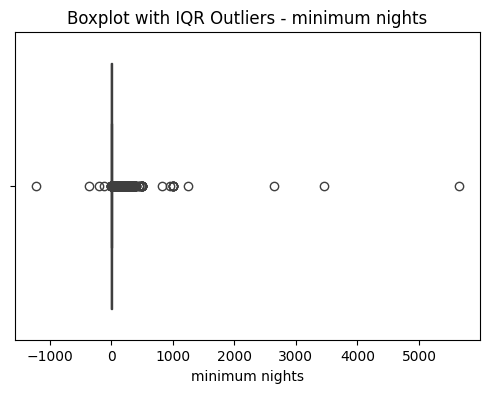

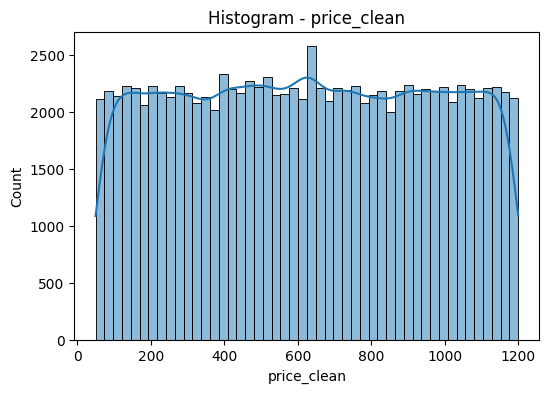

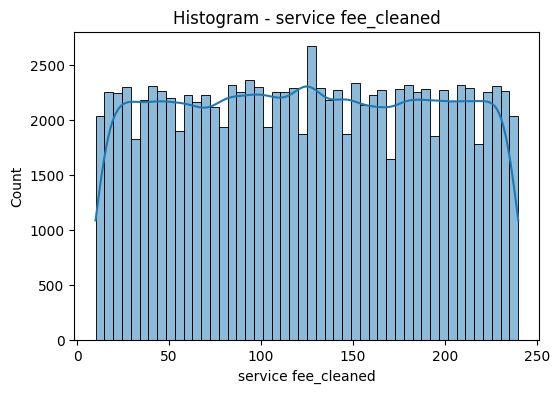

In [85]:
for col in columns_to_analyze_iqr:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot with IQR Outliers - {col}')
    plt.show()
    
for col in columns_to_analyze_zscore:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Histogram - {col}')
    plt.show()

3

As "price_clean and service fee_cleaned" have no outliers so no tirmming or capping
But "minimum nights" has many outliers so trimming is not a good option, we would rather be using capping for it

After Capping Outliers in 'minimum nights':


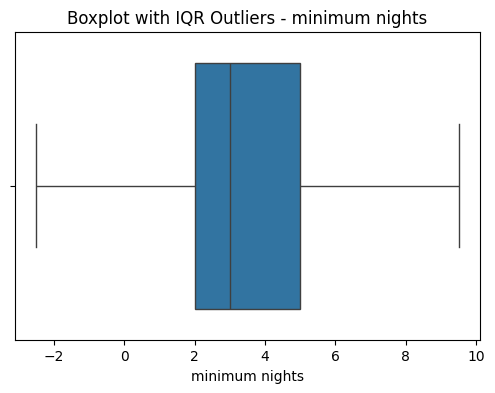

In [88]:
l_bound = iqr_results['minimum nights']['lower_bound']
u_bound = iqr_results['minimum nights']['upper_bound']
df['minimum nights'] = df['minimum nights'].clip(lower=l_bound, upper=u_bound)

print("After Capping Outliers in 'minimum nights':")
for col in columns_to_analyze_iqr:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot with IQR Outliers - {col}')
    plt.show()

PART C

1

In [123]:
#aggregation on country level
agg_df=df.groupby("country").agg( avg_price=('price_clean','mean'), avg_reviews=('review rate number','mean')  ).reset_index()
print(agg_df)


#doing it beacuse in airbnb dataset i did it for text casing
happiness_df["Country"]=happiness_df["Country"].astype(str).str.strip().str.upper().replace(["NAN","NaN","nan","None","NONE"], pd.NA)
#display(happiness_df.sample(10))
    
    
#merging two datasets on country
merged_df = pd.merge(agg_df, happiness_df, left_on='country', right_on='Country', how='inner')
    
display(merged_df)
    

         country   avg_price  avg_reviews
0  UNITED STATES  625.318342     3.279702


,country,avg_price,avg_reviews,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,...,Trust..Government.Corruption.,Dystopia.Residual,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Perceptions of corruption
0,UNITED STATES,625.318342,3.279702,UNITED STATES,North America,15.0,7.119,0.03839,1.39451,1.247110,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,UNITED STATES,625.318342,3.279702,UNITED STATES,North America,13.0,7.104,NaN,1.50796,1.047820,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,UNITED STATES,625.318342,3.279702,UNITED STATES,NaN,NaN,NaN,NaN,NaN,1.419921,...,0.135639,2.218113,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


2

So no correlation found between average price and happiness score

In [ ]:
print(merged_df[["avg_price","Happiness Score"]].corr())

#So no correlation found between average price and happiness score
#also indicates that avg_price has not variance at all


                 avg_price  Happiness Score
avg_price              NaN              NaN
Happiness Score        NaN              1.0


3

PART-D

1

2
Have done it already in Part-A

3

In [108]:
numeric_airbnb_df=df.select_dtypes(include=['number'])

display(numeric_airbnb_df.corr())

,id,host id,lat,long,Construction year,minimum nights,number of reviews,reviews per month,review rate number,calculated host listings count,availability 365,price_clean,service fee_cleaned
id,1.000000,-0.000989,-0.008977,0.041578,0.001476,0.027505,-0.041721,0.040254,0.036376,0.024044,-0.138560,0.006823,0.007185
host id,-0.000989,1.000000,0.001024,-0.007934,0.004820,0.000198,-0.004704,-0.002766,0.003404,0.001730,-0.002438,0.003467,0.003268
lat,-0.008977,0.001024,1.000000,0.074366,0.005099,0.036075,-0.024624,-0.020992,-0.003496,0.032165,-0.005492,-0.005788,-0.005801
long,0.041578,-0.007934,0.074366,1.000000,0.000679,-0.108753,0.068456,0.116801,0.014941,-0.103941,0.059063,0.003789,0.003635
Construction year,0.001476,0.004820,0.005099,0.000679,1.000000,-0.002638,0.001707,0.003659,0.004662,-0.002658,-0.008096,-0.004768,-0.004463
minimum nights,0.027505,0.000198,0.036075,-0.108753,-0.002638,1.000000,-0.159654,-0.285152,0.009378,0.199141,0.084678,-0.003299,-0.003343
number of reviews,-0.041721,-0.004704,-0.024624,0.068456,0.001707,-0.159654,1.000000,0.601005,-0.018379,-0.080716,0.098962,0.005311,0.005175
reviews per month,0.040254,-0.002766,-0.020992,0.116801,0.003659,-0.285152,0.601005,1.000000,0.034575,-0.030256,0.072443,0.004296,0.004175
review rate number,0.036376,0.003404,-0.003496,0.014941,0.004662,0.009378,-0.018379,0.034575,1.000000,0.024406,-0.006379,-0.004717,-0.004507
calculated host listings count,0.024044,0.001730,0.032165,-0.103941,-0.002658,0.199141,-0.080716,-0.030256,0.024406,1.000000,0.158307,-0.000114,0.000024


In [ ]:
4

In [112]:
categorical_df=df.select_dtypes(include=['object'])

display(categorical_df.sample(10))

for col in categorical_df.columns:
    print(f"Value counts for column: {col}")
    print(categorical_df[col].value_counts())
    print("-----")

,NAME,host_identity_verified,host name,neighbourhood group,neighbourhood,country,country code,instant_bookable,cancellation_policy,room type
16425,"COZY, QUIET ABODE NEAR TIMES SQUARE",VERIFIED,NINA,MANHATTAN,HELL'S KITCHEN,UNITED STATES,US,TRUE,FLEXIBLE,ENTIRE HOME/APT
83591,COOL TOWN HOUSE,UNCONFIRMED,MARK,BROOKLYN,CARROLL GARDENS,UNITED STATES,US,FALSE,FLEXIBLE,ENTIRE HOME/APT
87004,CHARMING 2 BEDROOM IN SOHO,UNCONFIRMED,ANA,MANHATTAN,NOLITA,UNITED STATES,US,TRUE,FLEXIBLE,PRIVATE ROOM
61332,HUGE FULL FLOOR LOFT ON BROADWAY AND BLEECKER,UNCONFIRMED,DAVID,MANHATTAN,GREENWICH VILLAGE,UNITED STATES,US,TRUE,FLEXIBLE,ENTIRE HOME/APT
7072,"DREAMY BROWNSTONE WITH COZY ROOM, BIG CLOSET, ...",UNCONFIRMED,GARRISON,BROOKLYN,PARK SLOPE,UNITED STATES,US,TRUE,STRICT,PRIVATE ROOM
41116,*NEW* MODERN 2 BEDROOM IN BROOKLYN SLEEPS UP TO 8,UNCONFIRMED,ALEX,BROOKLYN,CLINTON HILL,UNITED STATES,US,FALSE,FLEXIBLE,ENTIRE HOME/APT
13404,PRIME WILLIAMSBURG LOCATION,VERIFIED,ROBERT,BROOKLYN,WILLIAMSBURG,UNITED STATES,US,TRUE,MODERATE,ENTIRE HOME/APT
87816,CROWN HEIGHTS BROOKLYN ROOM NEAR FRANKLIN AVE,UNCONFIRMED,CHRIS,BROOKLYN,CROWN HEIGHTS,UNITED STATES,US,TRUE,FLEXIBLE,PRIVATE ROOM
76876,LOVELY CHIC DOUBLE TWIN ROOM AT THE RIDGE,VERIFIED,THE RIDGE,MANHATTAN,EAST VILLAGE,UNITED STATES,US,FALSE,MODERATE,PRIVATE ROOM
88289,CUSTOM DESIGNED WEST VILLAGE 2 BEDROOM,VERIFIED,SAM,MANHATTAN,WEST VILLAGE,UNITED STATES,US,TRUE,FLEXIBLE,ENTIRE HOME/APT


Value counts for column: NAME
NAME
HOME AWAY FROM HOME                                   319
PRIVATE ROOM                                           48
HILLSIDE HOTEL                                         32
WATER VIEW KING BED HOTEL ROOM                         30
BROOKLYN APARTMENT                                     30
                                                     ... 
SPACIOUS AND BRIGHT TWO BEDROOM BEDROOM APARTMENT.      1
QUIET BROOKLYN LOFT RETREAT+ROOF DECK 6                 1
ONE BEDROOM BEAUTY IN BUSHWICK                          1
MANHATTAN TIME SQUARE PRIVATE ROOM                      1
KOSY APT W MODERN NEW FURNITURE IN THE HEART OF NY      1
Name: count, Length: 60662, dtype: int64
-----
Value counts for column: host_identity_verified
host_identity_verified
UNCONFIRMED    52495
VERIFIED       52156
Name: count, dtype: int64
-----
Value counts for column: host name
host name
MICHAEL           1327
DAVID              776
JOHN               585
ALEX               55

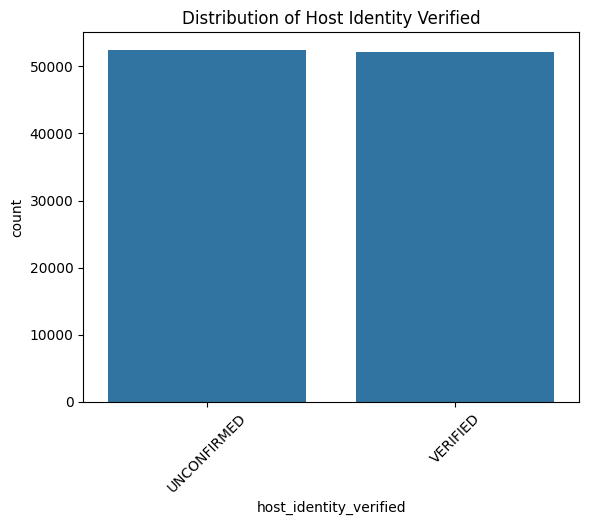

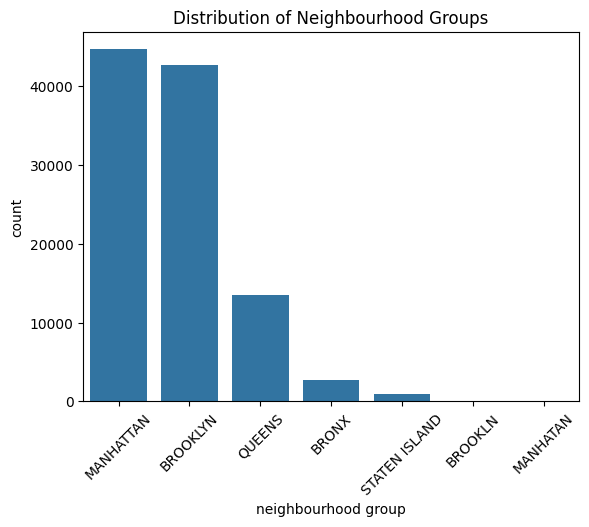

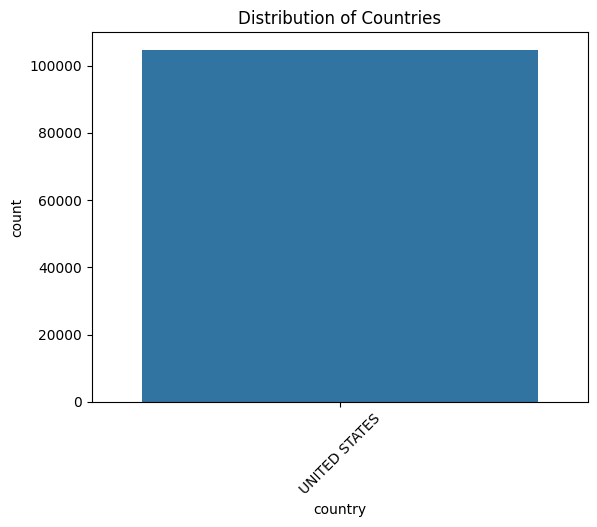

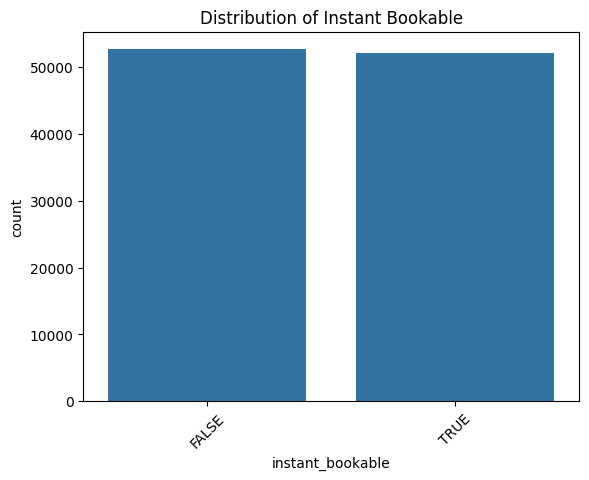

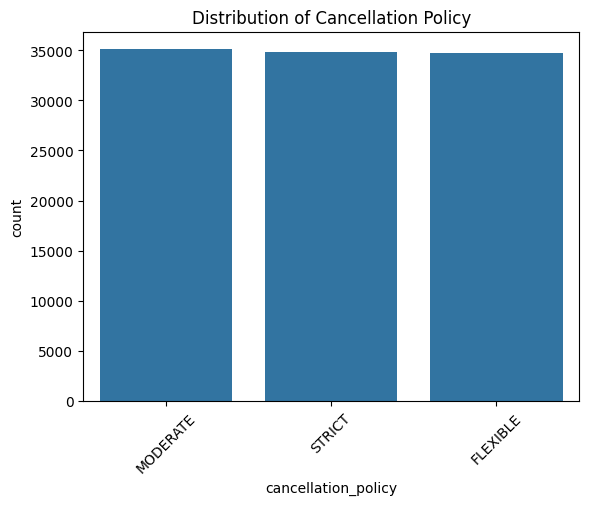

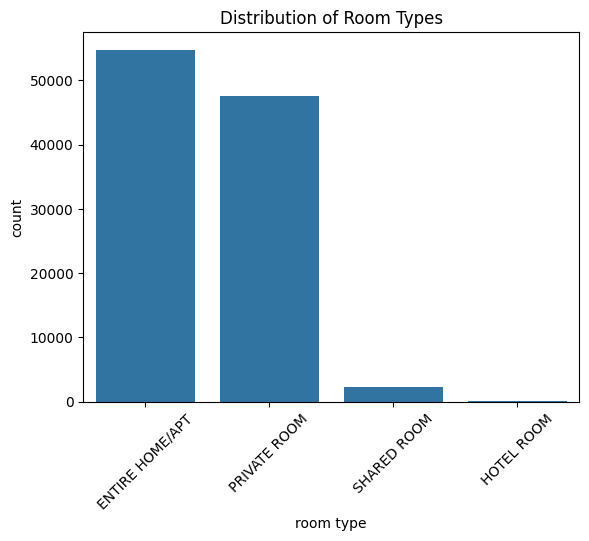

In [114]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='host_identity_verified', order=df['host_identity_verified'].value_counts().index)
plt.title("Distribution of Host Identity Verified")
plt.xticks(rotation=45)
plt.show()



sns.countplot(data=df, x='neighbourhood group', order=df['neighbourhood group'].value_counts().index)
plt.title("Distribution of Neighbourhood Groups")
plt.xticks(rotation=45)
plt.show()


sns.countplot(data=df, x='country', order=df['country'].value_counts().index)
plt.title("Distribution of Countries")
plt.xticks(rotation=45)
plt.show()



sns.countplot(data=df, x='instant_bookable', order=df['instant_bookable'].value_counts().index)
plt.title("Distribution of Instant Bookable")
plt.xticks(rotation=45)
plt.show()



sns.countplot(data=df, x='cancellation_policy', order=df['cancellation_policy'].value_counts().index)
plt.title("Distribution of Cancellation Policy")   
plt.xticks(rotation=45)
plt.show()



sns.countplot(data=df, x='room type', order=df['room type'].value_counts().index)
plt.title("Distribution of Room Types")
plt.xticks(rotation=45)
plt.show()


5

In [115]:
df.to_csv("cleaned_listings_airbnb.csv", index=False)

PART-E

1

these were the following challanges:
->To convert "service fee" into consistent data type. Then i create a function with reg_ex that identifies the distinct patterns in the column and then i just removed those patterns and convert them into a single consistnent format.
->How should i check whether the data is mixed  (num + string ), Then i used (df[column_name].apply(lambda x: type(x)).value_counts()), it basically replaces the value with its data type and counts the values of those data types. So it tells me what data types are mixed in object data type
->while removing near-duplicate Airbnb listings using fuzzy matching.


2
each transformation has its own contrbutions to improve the quality of dataset but these improves alot 
->missing values handling because there were alot of missing values which can be shown via stats
->then outliers handling for minimum nights because it has a lrage number of outliers and would have affected the model very badly.


3
We have almost done feature transformation phase.
As we would be modelling it later so we would do:
->feature selection 
->feature extraction

Bonus